In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

# Baseline

In [10]:
data_sizes = ['10MB', '100MB', '1GB','10GB']
query_numbers = list(np.arange(22) + 1)
print(query_numbers)
party_number = 2


data_size_dict = {}

from collections import defaultdict

for data_size in data_sizes:
    time_taken_col = f"{data_size}"
    cols = ["query", time_taken_col]
    path = f"baseline_data/{data_size}_{party_number}.csv"
    query_dict = defaultdict(list)

    print(query_dict)

    # try:
    data = pd.read_csv(path, names=cols, header=None)
    time_col = data.loc[:,time_taken_col]
    query_col = data.loc[:,"query"]
    # data.set_axis(cols, axis=1)
    for idx, query_num in enumerate(query_col):
        query_dict[query_num].append(time_col[idx])
    print(query_dict)
    data_size_dict[data_size] = [pd.Series(value).rename(k) for k, value in query_dict.items()]
    # except:
    #     print(f"Failed to read file {path}")
baseline_dict = data_size_dict

for i in range(len(query_numbers)):
    print(baseline_dict['100MB'][i])

# Returns a baseline_dict with key = data size

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
defaultdict(<class 'list'>, {})
defaultdict(<class 'list'>, {1: [0.3205418586730957, 0.321028470993042, 0.3196730613708496], 2: [0.0914616584777832, 0.0935521125793457, 0.09033203125], 3: [0.4049487113952636, 0.4037511348724365, 0.4057605266571045], 4: [0.3889975547790527, 0.3883883953094482, 0.3867886066436767], 5: [0.3409514427185058, 0.3404266834259033, 0.3400862216949463], 6: [0.3102819919586181, 0.3047564029693603, 0.3085851669311523], 7: [0.4097499847412109, 0.404069185256958, 0.4093611240386963], 8: [0.4305453300476074, 0.4307804107666015, 0.433804988861084], 9: [0.4691152572631836, 0.4588181972503662, 0.4630248546600342], 10: [0.4069888591766357, 0.4063718318939209, 0.4067006111145019], 11: [0.081888198852539, 0.0822870731353759, 0.0798840522766113], 12: [0.3466107845306396, 0.3416526317596435, 0.3400707244873047], 13: [0.1073012351989746, 0.1070284843444824, 0.1079516410827636], 14: [0.330021142959

# Data Station

In [11]:
data_sizes = ['10MB', '100MB', '1GB','10GB']
query_numbers = list(np.arange(22) + 1)
print(query_numbers)
party_number = 2


data_size_dict = {}

from collections import defaultdict

for data_size in data_sizes:
    time_taken_col = f"{data_size}"
    cols = ["query", time_taken_col]
    path = f"ds_data/{data_size}_{party_number}.csv"
    query_dict = defaultdict(list)

    print(query_dict)

    # try:
    data = pd.read_csv(path, names=cols, header=None)
    time_col = data.loc[:,time_taken_col]
    query_col = data.loc[:,"query"]
    # data.set_axis(cols, axis=1)
    for idx, query_num in enumerate(query_col):
        query_dict[query_num].append(time_col[idx])
    print(query_dict)
    data_size_dict[data_size] = [pd.Series(value).rename(k) for k, value in query_dict.items()]
    # except:
    #     print(f"Failed to read file {path}")
data_station_dict = data_size_dict

for i in range(len(query_numbers)):
    print(data_station_dict['100MB'][i])

# Returns a baseline_dict with key = data size

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
defaultdict(<class 'list'>, {})
defaultdict(<class 'list'>, {1: [1.891122579574585, 1.8480558395385744, 1.8303420543670652], 2: [1.6399710178375244, 1.6699576377868652, 1.644127368927002], 3: [1.967576026916504, 1.9516339302062988, 1.976362705230713], 4: [1.9492089748382568, 1.94196891784668, 1.9255516529083248], 5: [1.9759786128997805, 1.980703592300415, 1.970327615737915], 6: [1.8477516174316408, 1.839913845062256, 1.842390775680542], 7: [2.038940906524658, 1.9974994659423828, 1.9758319854736328], 8: [1.997041940689087, 2.002032518386841, 1.997777223587036], 9: [2.066415548324585, 2.0556325912475586, 2.034247398376465], 10: [1.943162441253662, 1.9666907787323, 1.957270860671997], 11: [1.6053240299224854, 1.6108763217926023, 1.61049222946167], 12: [1.9212687015533447, 1.955639362335205, 1.947497129440308], 13: [1.675220012664795, 1.675365686416626, 1.6524112224578855], 14: [1.872547626495361, 1.87183141708

# Plots

In [12]:
def raw_mmm(df):
    median = df.median()
    min = df.min()
    max = df.max()
    return min, median, max

[(0.3196730613708496, 0.3205418586730957, 0.321028470993042), (0.09033203125, 0.0914616584777832, 0.0935521125793457), (0.4037511348724365, 0.4049487113952636, 0.4057605266571045), (0.3867886066436767, 0.3883883953094482, 0.3889975547790527), (0.3400862216949463, 0.3404266834259033, 0.3409514427185058), (0.3047564029693603, 0.3085851669311523, 0.3102819919586181), (0.404069185256958, 0.4093611240386963, 0.4097499847412109), (0.4305453300476074, 0.4307804107666015, 0.433804988861084), (0.4588181972503662, 0.4630248546600342, 0.4691152572631836), (0.4063718318939209, 0.4067006111145019, 0.4069888591766357), (0.0798840522766113, 0.081888198852539, 0.0822870731353759), (0.3400707244873047, 0.3416526317596435, 0.3466107845306396), (0.1070284843444824, 0.1073012351989746, 0.1079516410827636), (0.3284404277801513, 0.3298487663269043, 0.3300211429595947), (0.312892198562622, 0.3172354698181152, 0.3183605670928955), (0.0996291637420654, 0.0999898910522461, 0.101351261138916), (0.325863122940063

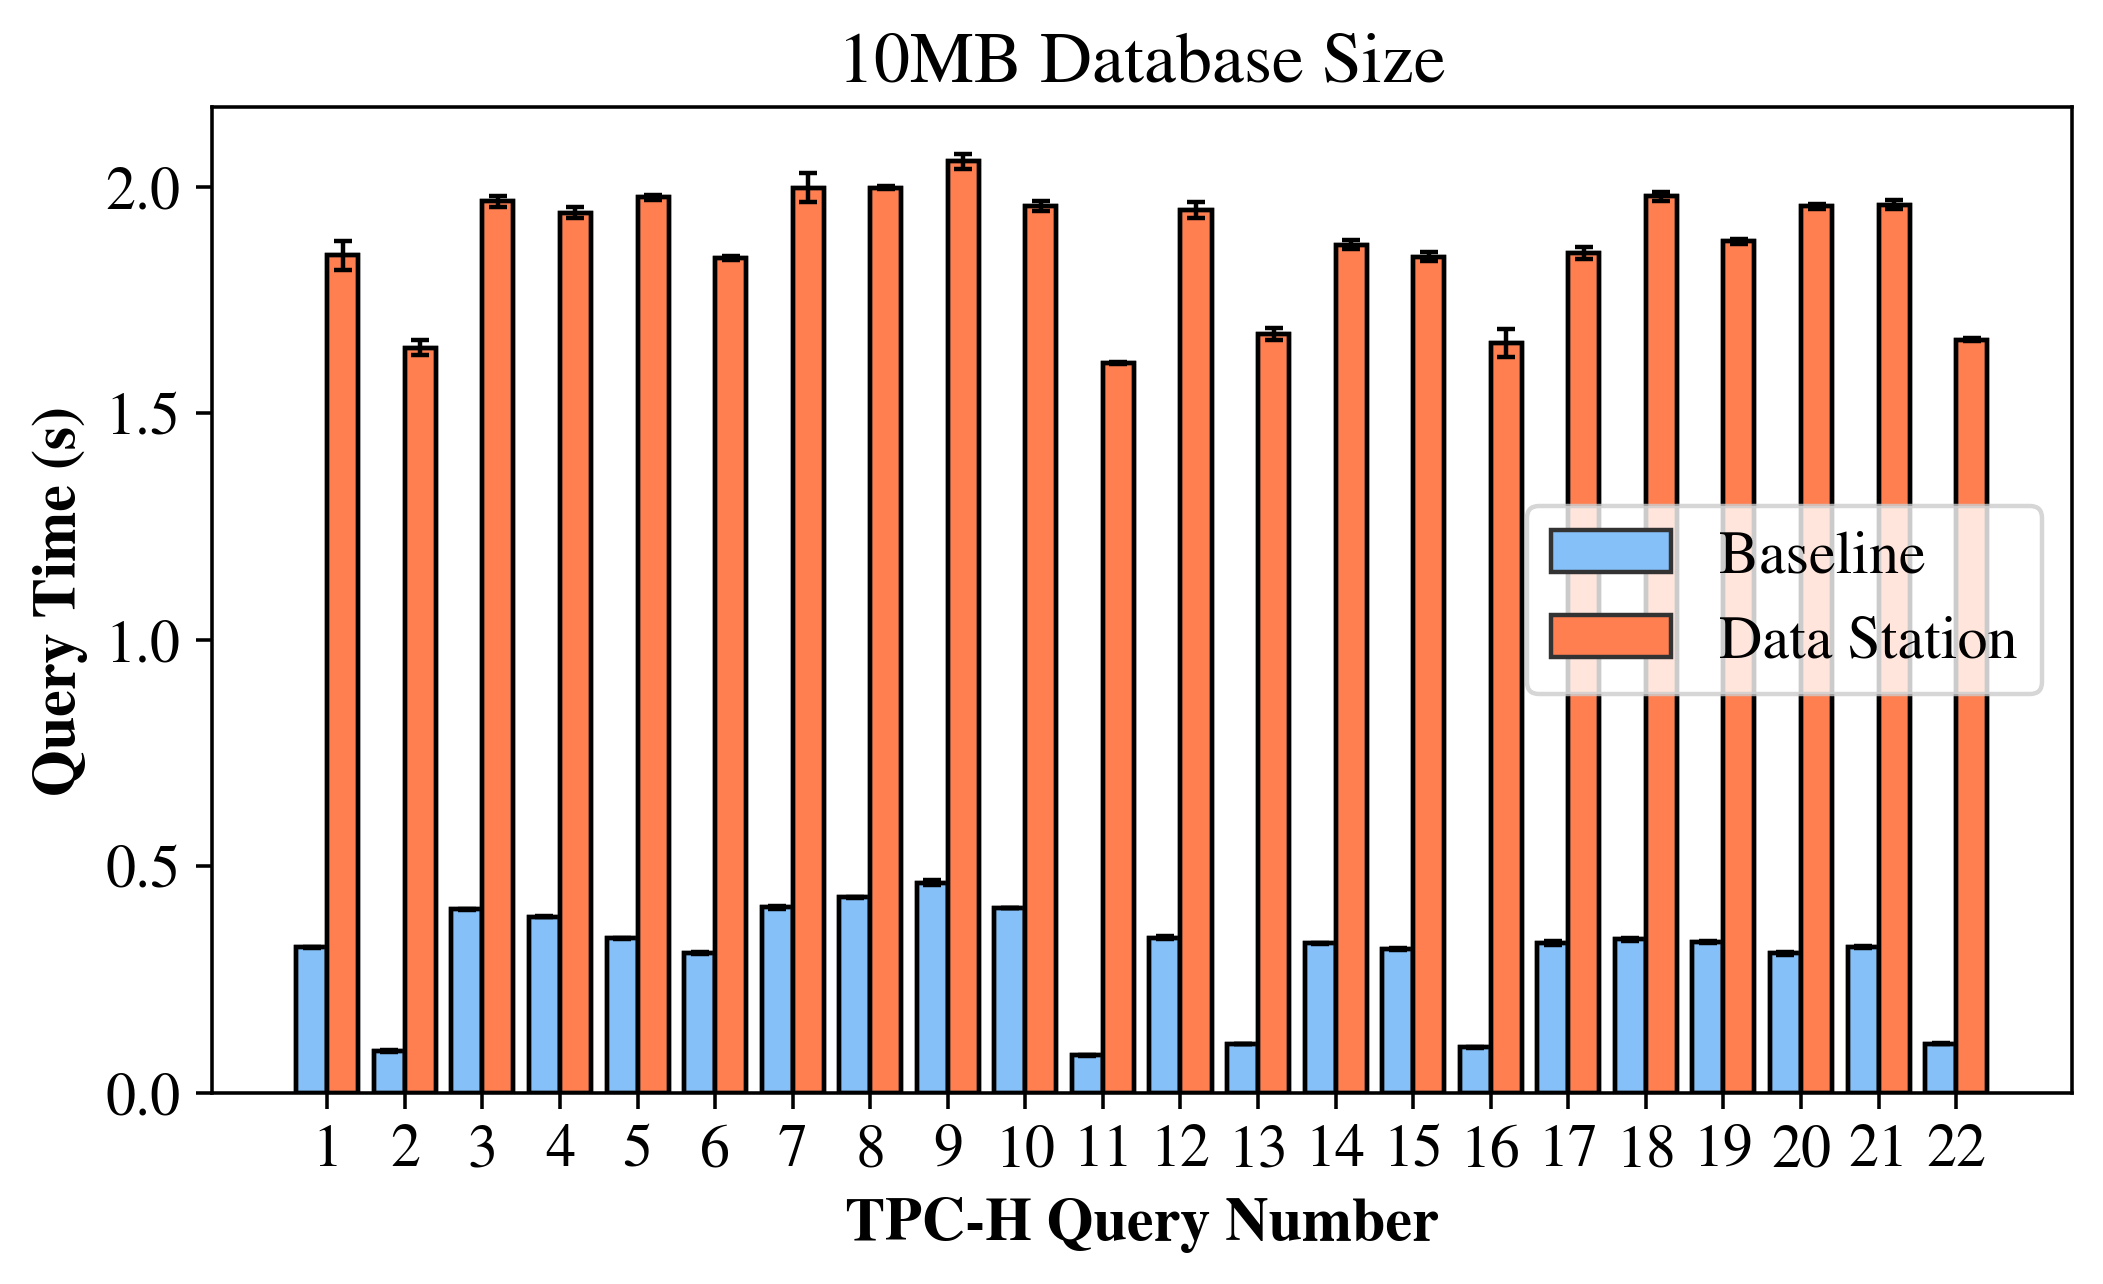

In [13]:
data_left = baseline_dict['10MB']
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict['10MB']
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(22)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(stdev_left)
print(medians_left)

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Baseline",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.xlabel("TPC-H Query Number", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.title("10MB Database Size")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("10mb.pdf", bbox_inches='tight')

plt.show()

[(1.055793523788452, 1.0580132007598877, 1.0636675357818604), (0.2275750637054443, 0.2295525074005127, 0.2298264503479004), (1.306098699569702, 1.308272361755371, 1.3087573051452637), (1.2482249736785889, 1.25919508934021, 1.2630972862243652), (1.2423577308654783, 1.2519116401672363, 1.2696402072906494), (1.0191173553466797, 1.0309898853302002, 1.0360026359558103), (1.3218975067138672, 1.3251092433929443, 1.3337690830230713), (1.3529255390167236, 1.358560562133789, 1.3610951900482178), (1.4298996925354004, 1.4398350715637207, 1.4450883865356443), (1.304079532623291, 1.3171894550323486, 1.3279860019683838), (0.1683042049407959, 0.1685945987701416, 0.1696343421936035), (1.1835014820098877, 1.185225486755371, 1.193657636642456), (0.2951903343200683, 0.2959928512573242, 0.2973189353942871), (1.0789613723754885, 1.085184097290039, 1.0956461429595947), (1.02746844291687, 1.042017936706543, 1.0468647480010986), (0.2366893291473388, 0.2369356155395507, 0.2408487796783447), (1.0984890460968018,

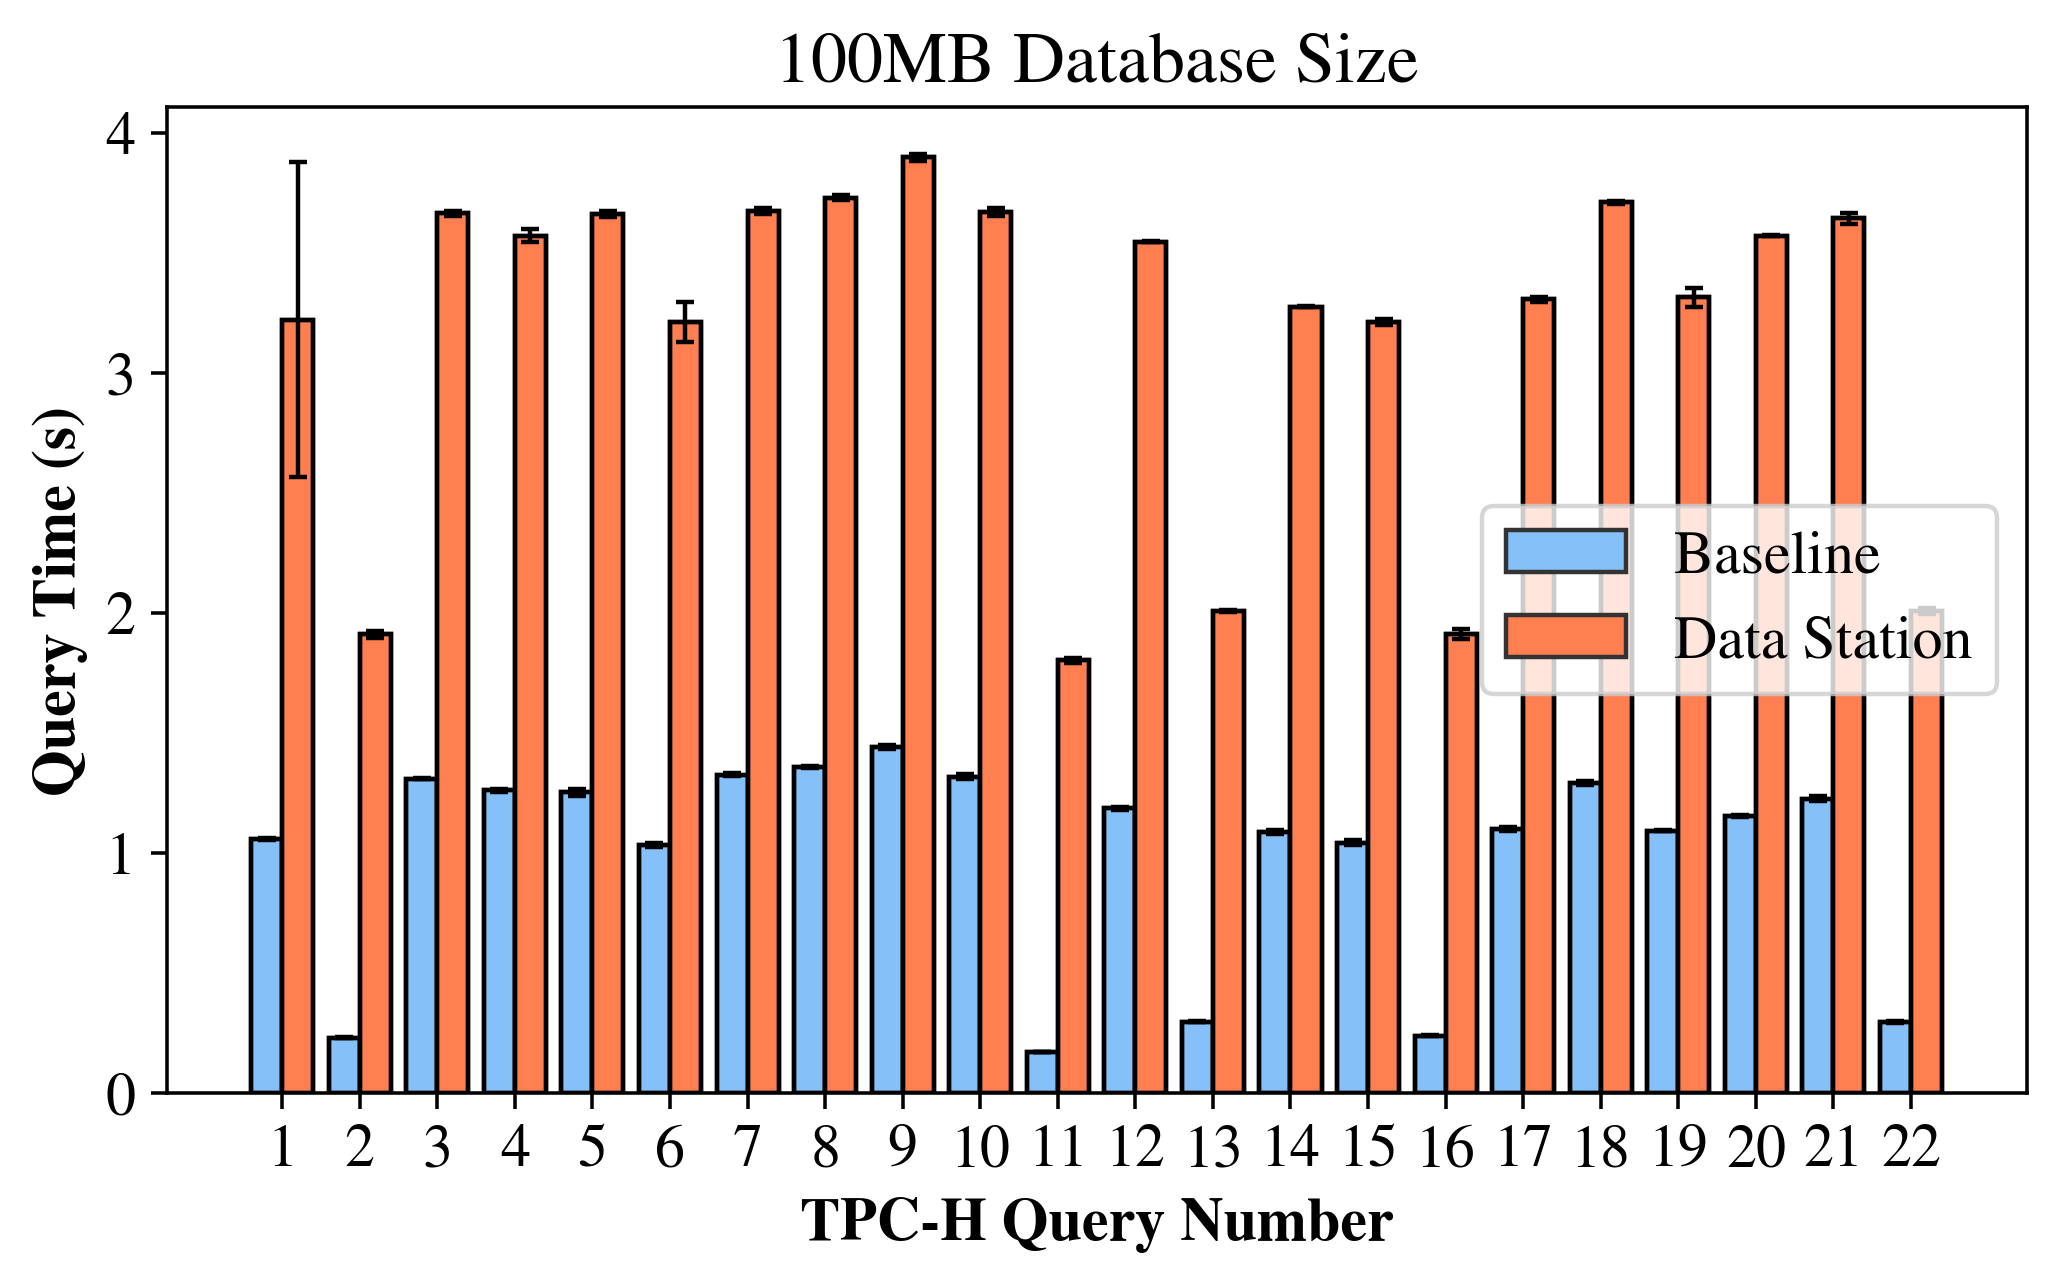

In [14]:
data_left = baseline_dict['100MB']
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict['100MB']
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(22)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(stdev_left)
print(medians_left)

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Baseline",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.xlabel("TPC-H Query Number", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.title("100MB Database Size")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("100mb.pdf", bbox_inches='tight')

plt.show()

[(8.544127941131592, 8.559484243392944, 8.65703272819519), (1.0669074058532717, 1.076794147491455, 1.0841147899627686), (10.142393350601196, 10.148736953735352, 10.166797876358032), (10.036770343780518, 10.044870615005491, 10.067095756530762), (10.079190731048584, 10.09363055229187, 10.163721084594728), (8.399032831192017, 8.418665409088135, 8.476130247116089), (10.308624744415283, 10.343933343887327, 10.372007369995115), (10.326355934143066, 10.362320184707642, 10.368144273757936), (11.011403560638428, 11.013329267501833, 11.050512075424194), (10.235268115997314, 10.2365243434906, 10.293893337249756), (0.7817642688751221, 0.7922441959381104, 0.7949261665344238), (9.797757148742676, 9.812649250030518, 9.847683191299438), (1.7441651821136477, 1.7562222480773926, 1.7576584815979004), (8.617753505706787, 8.65645170211792, 8.681785106658936), (8.475366592407227, 8.481828927993774, 8.491882801055908), (1.0681092739105225, 1.072819471359253, 1.0942552089691162), (8.818888187408447, 8.8337311

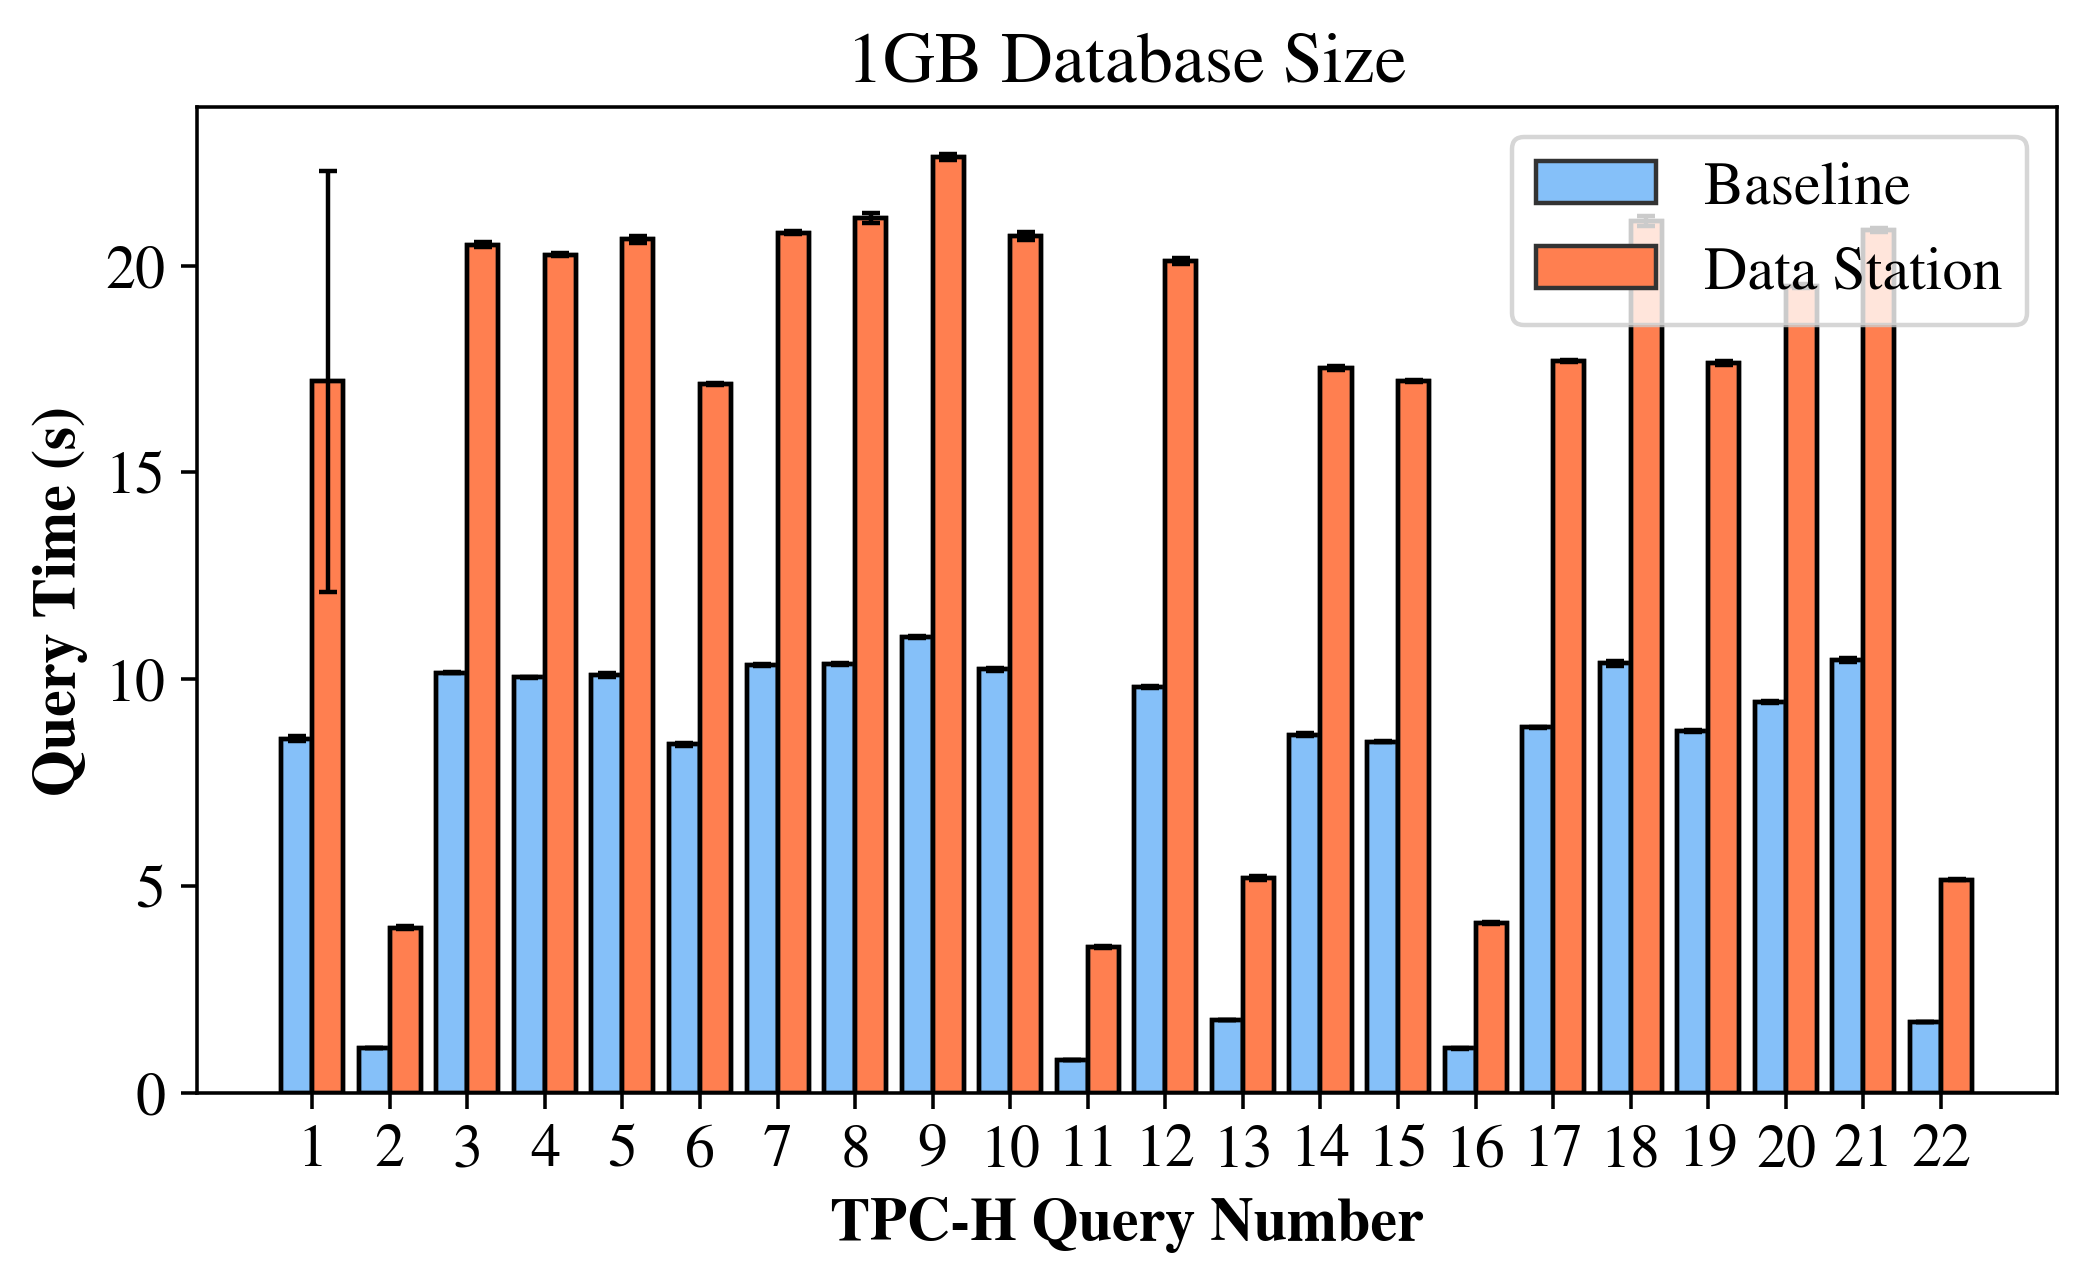

In [15]:
data_left = baseline_dict['1GB']
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict['1GB']
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(22)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(stdev_left)
print(medians_left)

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Baseline",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.xlabel("TPC-H Query Number", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.title("1GB Database Size")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("1gb.pdf", bbox_inches='tight')

plt.show()

[(84.52080225944519, 84.8412413597107, 84.89683198928833), (9.181524276733398, 9.20297646522522, 9.26071310043335), (99.39447808265686, 99.80313229560852, 100.04085922241212), (98.9905195236206, 99.37198519706726, 99.7973141670227), (99.18907761573792, 99.57478785514832, 100.1746096611023), (83.29145812988281, 83.56957197189331, 83.88013625144958), (101.28471398353577, 101.59903955459596, 101.89980959892272), (100.9598286151886, 101.4191415309906, 101.96536660194396), (108.46943259239195, 108.9266963005066, 108.94795870780943), (100.0696747303009, 100.27695918083192, 100.47816467285156), (6.966259479522705, 7.0081048011779785, 7.05738091468811), (97.40587401390076, 97.99387335777284, 98.03685760498048), (16.74082374572754, 16.76287817955017, 16.78305721282959), (85.33732748031616, 85.72387647628784, 85.75972437858582), (83.77782392501831, 84.15572595596313, 84.39160227775574), (9.372998237609863, 9.437476634979248, 9.443771362304688), (87.13940048217773, 87.66400647163391, 87.734358072

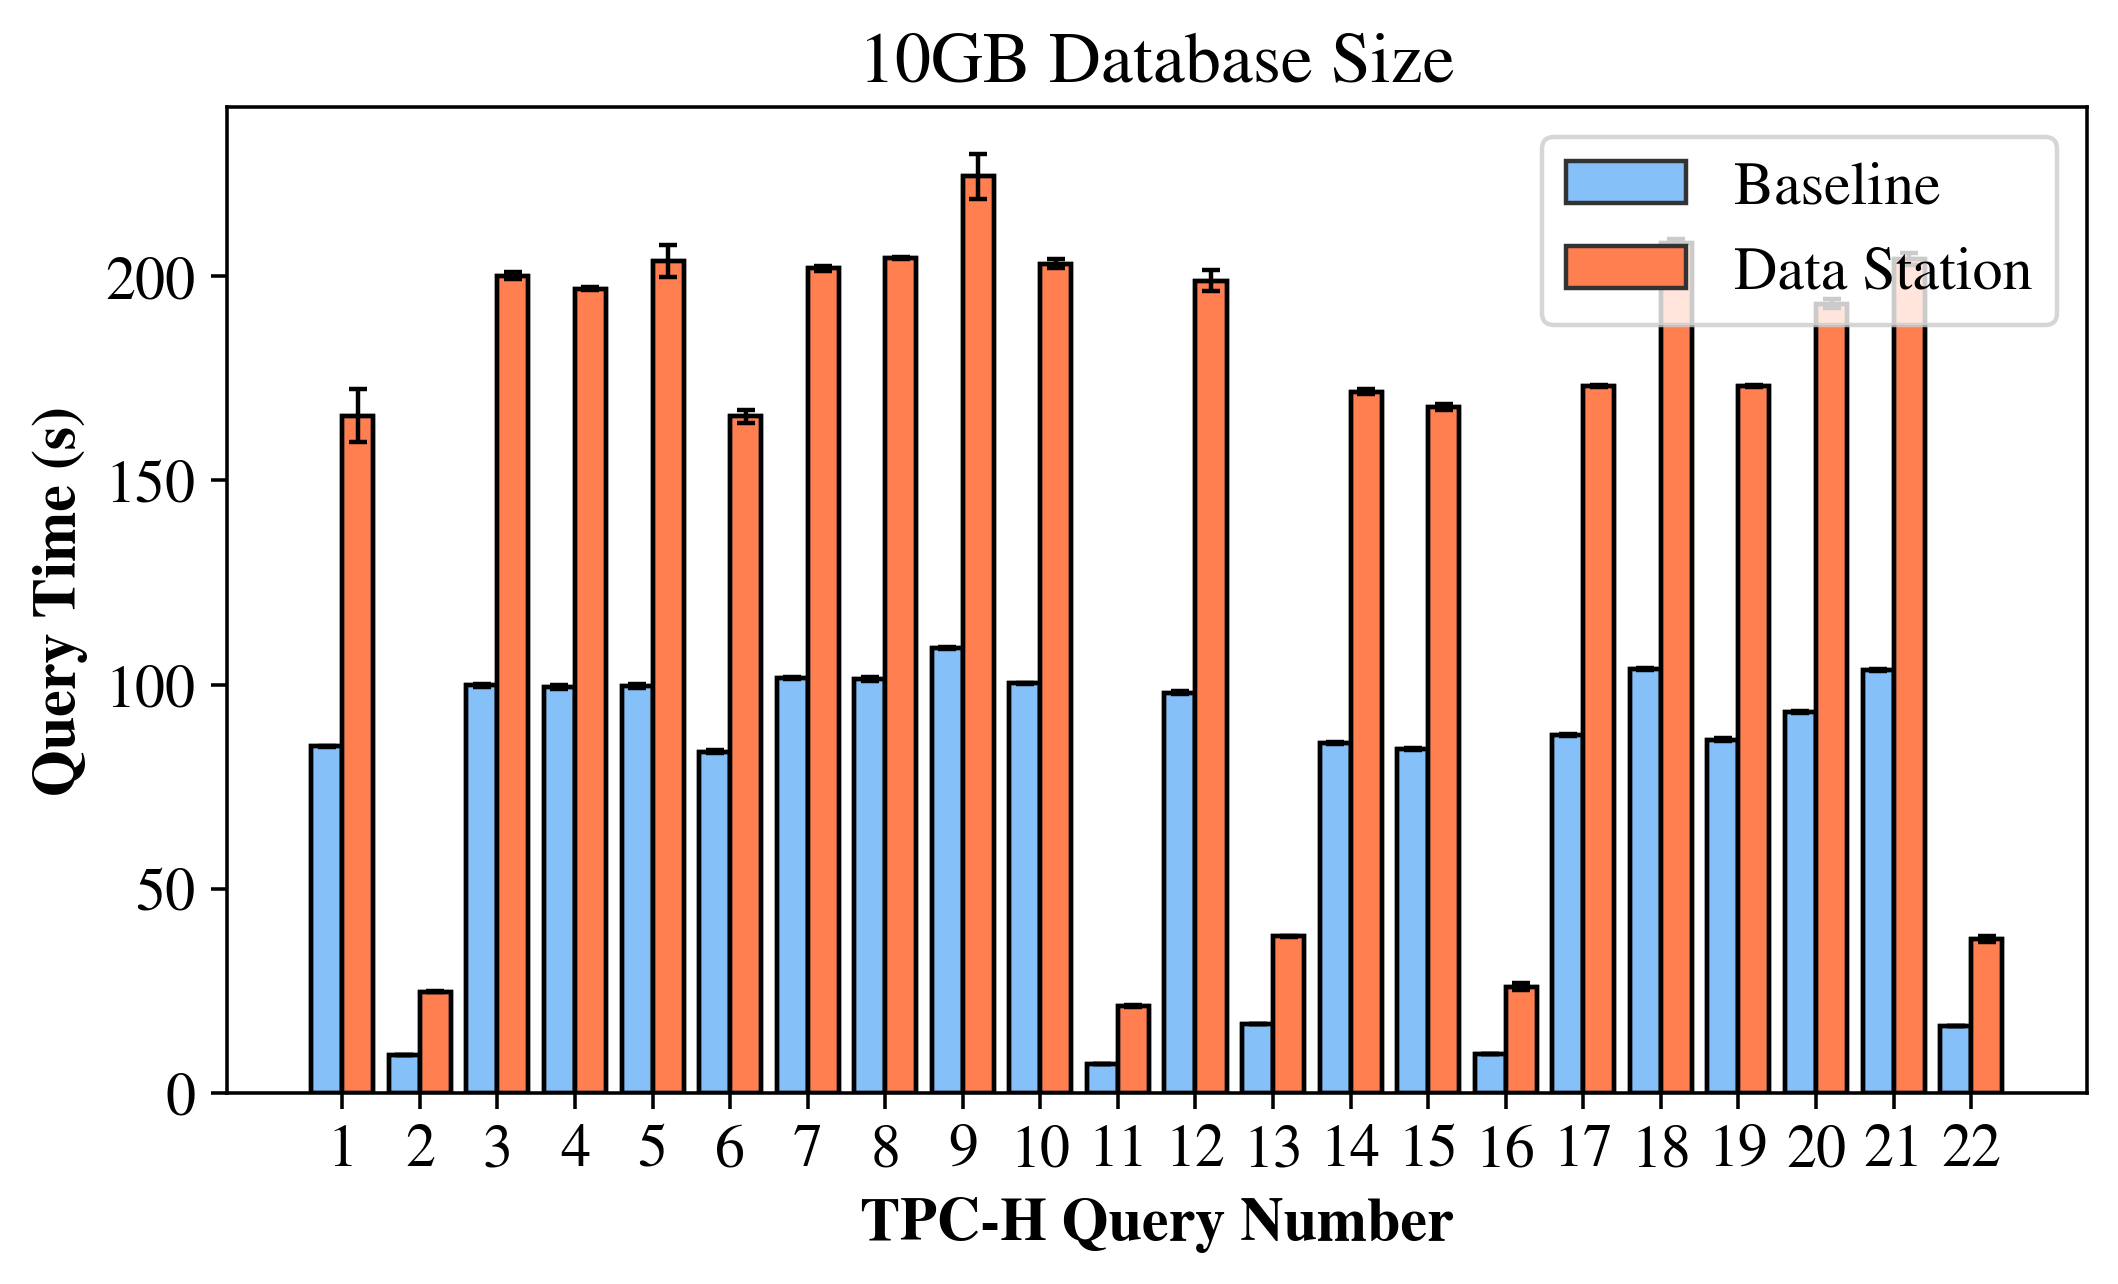

In [16]:
data_left = baseline_dict['10GB']
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict['10GB']
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(22)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(stdev_left)
print(medians_left)

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Baseline",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.xlabel("TPC-H Query Number", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
plt.title("10GB Database Size")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("10gb.pdf", bbox_inches='tight')

plt.show()